In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

This project is about data

In [2]:
majors = pd.read_csv('college-majors/recent-grads.csv')
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
stem_women = pd.read_csv('college-majors/women-stem.csv')
stem_women.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [5]:
stem = ['Engineering', 'Physical Sciences', 'Computers & Mathematics', 'Health', 'Biology & Life Science']

majors_stem = majors[majors['Major_category'].isin(stem)]

In [6]:
majors_stem['perc_college_jobs'] = majors_stem['College_jobs'] / majors_stem['Employed']

C:\Users\Beger\AppData\Local\Temp/ipykernel_13388/1697379481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  majors_stem['perc_college_jobs'] = majors_stem['College_jobs'] / majors_stem['Employed']


<AxesSubplot:>

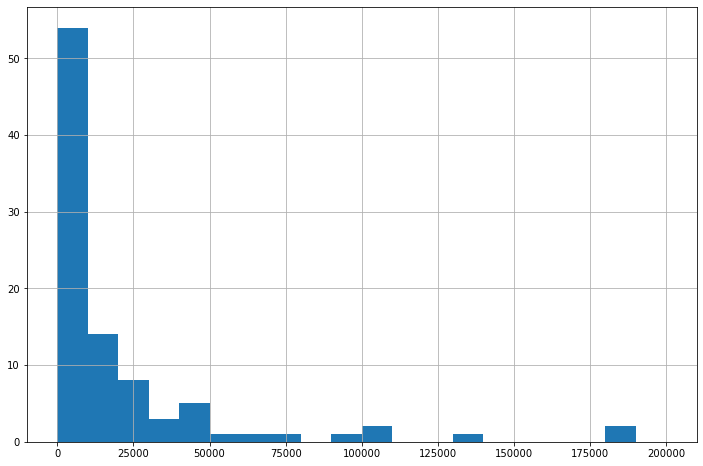

In [6]:
majors_stem['Employed'].hist(bins=20, range=(0,200000), figsize=(12,8))

<AxesSubplot:>

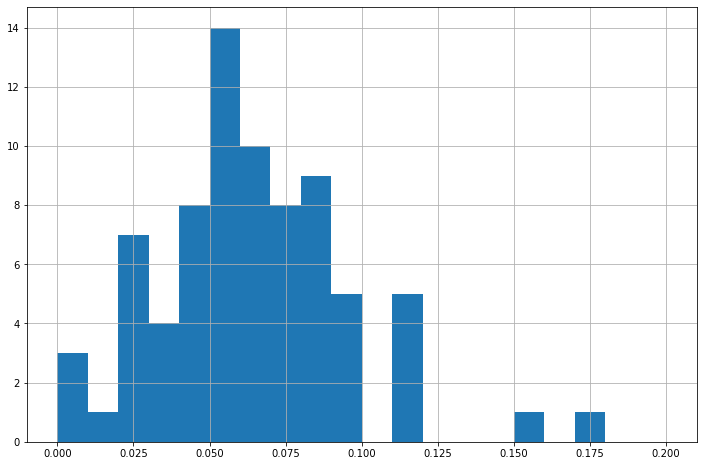

In [7]:
majors_stem['Unemployment_rate'].hist(bins=20, range=(0,0.2), figsize=(12,8))

<AxesSubplot:>

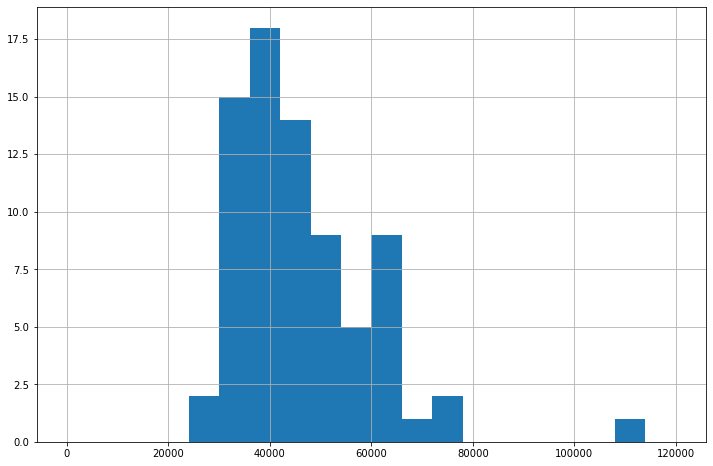

In [8]:
majors_stem['Median'].hist(bins=20, range=(0, 120000), figsize=(12,8))

<AxesSubplot:>

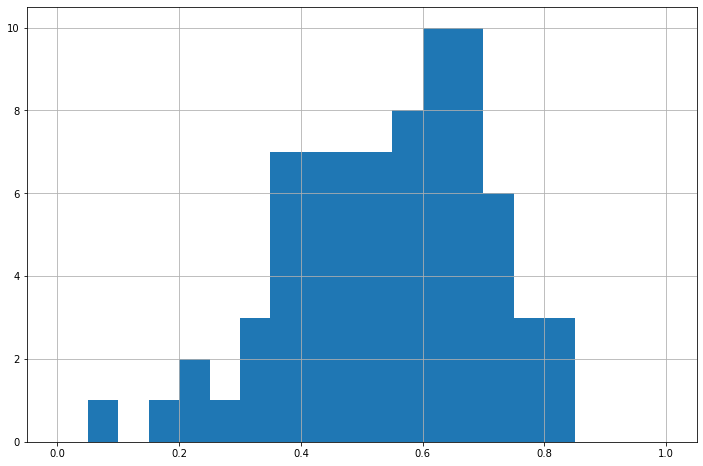

In [9]:
majors_stem['perc_college_jobs'].hist(bins=20, range=(0, 1), figsize=(12,8))

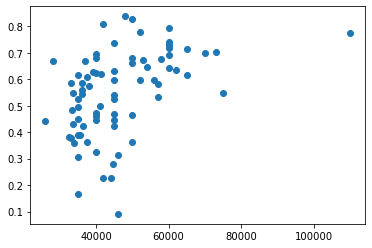

In [10]:
plt.scatter(majors_stem['Median'], majors_stem['perc_college_jobs'])

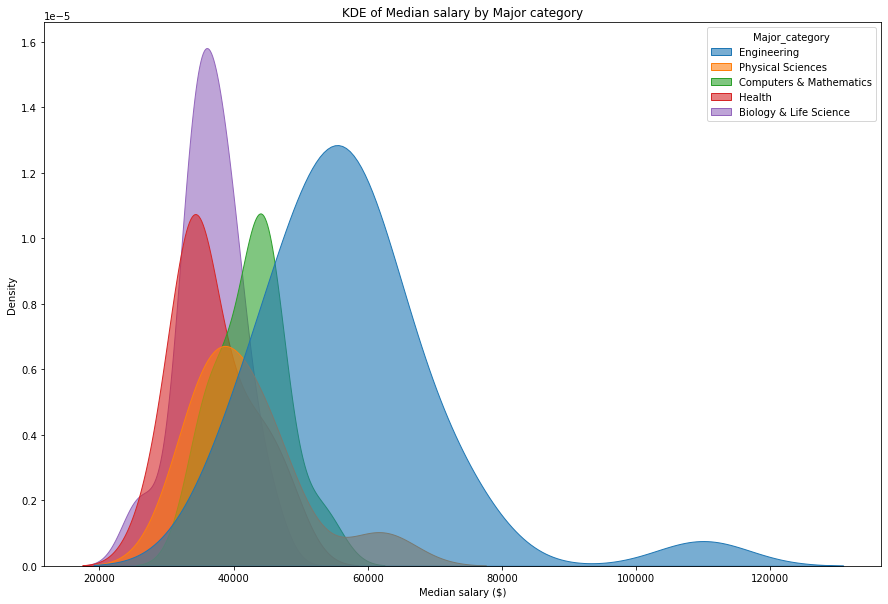

In [11]:
plt.figure(figsize=(15,10))

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "Median", data = majors_stem, fill = True, alpha = .6, hue = "Major_category", legend = True)
kde_plot.set_title("KDE of Median salary by Major category")
kde_plot.set_xlabel("Median salary ($)")

# Show
plt.show()

<AxesSubplot:xlabel='Median', ylabel='Major_category'>

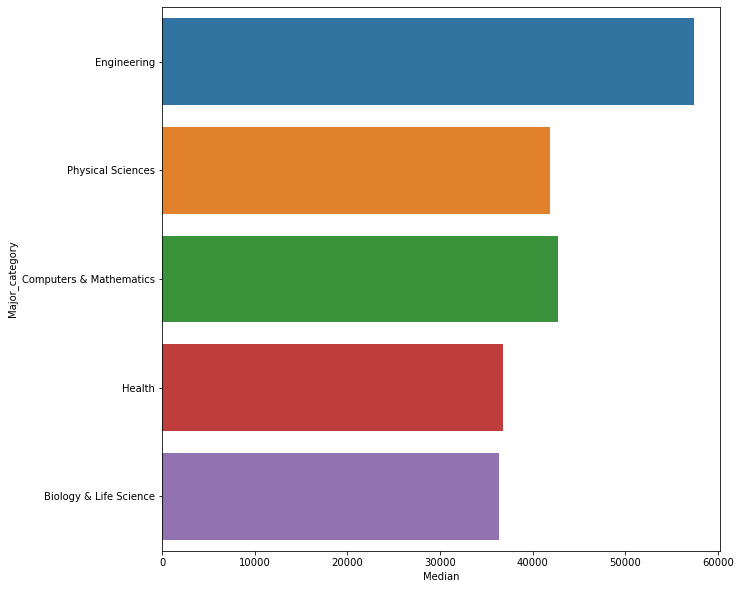

In [12]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

<AxesSubplot:xlabel='Median', ylabel='Major_category'>

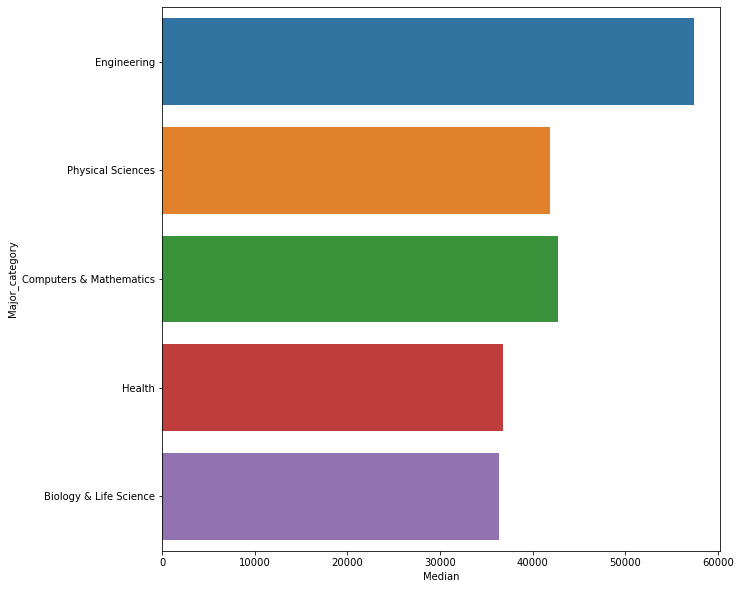

In [4]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major_category', data = stem_women, orient = 'h', ci = None)

<AxesSubplot:xlabel='P75th', ylabel='Major_category'>

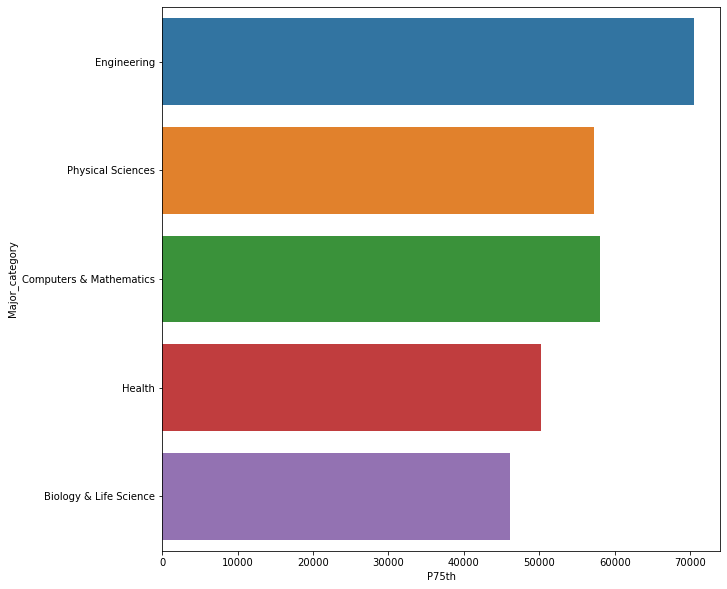

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'P75th', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

In [20]:
sum(majors_stem['Women']) / sum(majors_stem['Total'])

0.49831009477289673

<AxesSubplot:xlabel='ShareWomen', ylabel='Major_category'>

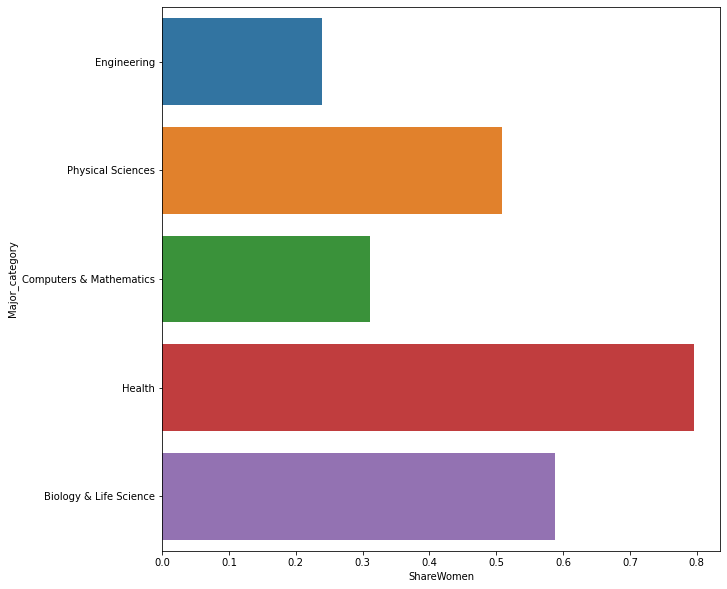

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'ShareWomen', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

In [17]:
majors_health = majors_stem[majors_stem['Major_category'] == 'Health']

majors_health.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,perc_college_jobs
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,122817,8497,0.044863,48000,39000,58000,151643,26146,6193,0.838256
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,9005,505,0.036983,45000,36000,50000,5546,7176,1002,0.421749
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4290,407,0.042507,42000,30000,65000,2091,6948,1270,0.228076
60,61,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,23551.0,8697.0,14854.0,Health,0.630716,38,16620,...,9131,977,0.055521,40000,20000,90000,11573,4493,1121,0.696330
88,89,6199,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,13386.0,1589.0,11797.0,Health,0.881294,81,10076,...,5868,893,0.081411,36000,23000,42000,5652,3835,1422,0.560937


<AxesSubplot:xlabel='ShareWomen', ylabel='Major'>

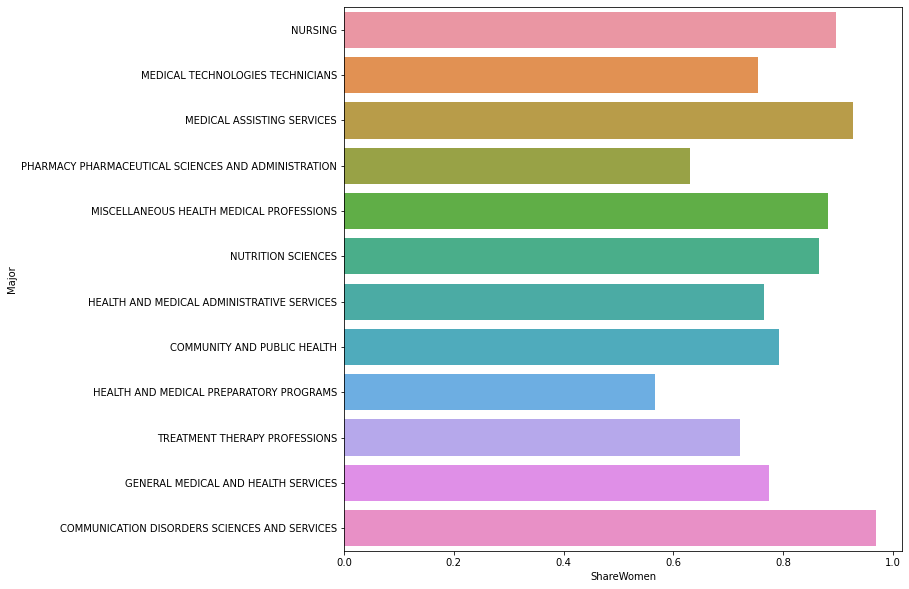

In [18]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'ShareWomen', y = 'Major', data = majors_health, orient = 'h', ci = None)

In [37]:
grad_df = pd.read_csv('college-majors/grad-students.csv')
grad_stem_df = grad_df[grad_df['Major_category'].isin(stem)]
grad_stem_df.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
8,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,5611,98,4716,3981,119,0.024612,85000.0,...,28314,22024,18381,2222,0.091644,60000.0,40000,85000.0,0.165394,0.416667
12,2504,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,6065,111,4442,3669,310,0.065236,78000.0,...,27999,23069,20418,998,0.041468,61000.0,42000,85000.0,0.178047,0.278689
15,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,Computers & Mathematics,11165,218,9037,7988,803,0.081606,80000.0,...,48776,41552,34402,2476,0.056237,58000.0,37700,84000.0,0.186266,0.379310
17,2599,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,14816,315,12433,11146,407,0.031698,80000.0,...,60571,50092,44199,3316,0.062088,65000.0,43000,90000.0,0.196533,0.230769


In [41]:
grad_stem_df['Diff_median'] = grad_stem_df['Grad_median'] - grad_stem_df['Nongrad_median']
grad_df['Diff_median'] = grad_df['Grad_median'] - grad_df['Nongrad_median']

C:\Users\Beger\AppData\Local\Temp/ipykernel_13388/3615149571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_stem_df['Diff_median'] = grad_stem_df['Grad_median'] - grad_stem_df['Nongrad_median']


<AxesSubplot:xlabel='Grad_median', ylabel='Major_category'>

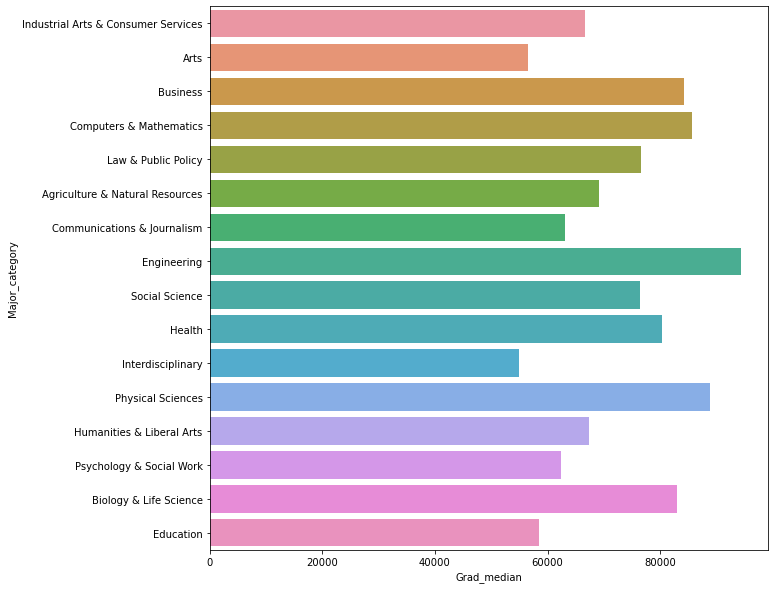

In [42]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Grad_median', y = 'Major_category', data = grad_df, orient = 'h', ci = None)

<AxesSubplot:xlabel='Diff_median', ylabel='Major_category'>

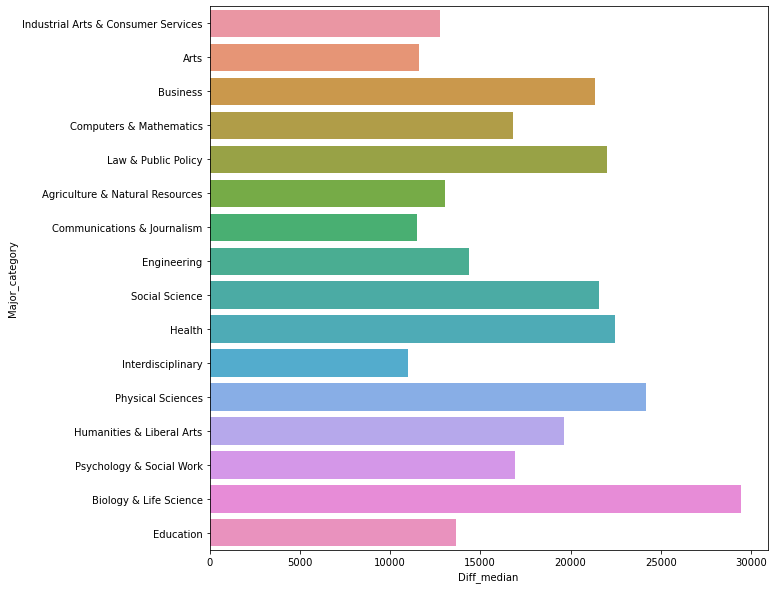

In [48]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Diff_median', y = 'Major_category', data = grad_df, orient = 'h', ci = None)

In [49]:
grad_df[grad_df['Major_category'] == 'Industrial Arts & Consumer Services']

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,Diff_median
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846,10000.0
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808,5400.0
11,5701,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",Industrial Arts & Consumer Services,3187,45,1984,1481,319,0.138515,62000.0,...,11921,9949,653,0.051933,50000.0,32400,75000.0,0.176771,0.240000,12000.0
14,5901,TRANSPORTATION SCIENCES AND TECHNOLOGIES,Industrial Arts & Consumer Services,27410,538,20035,18088,980,0.046633,90000.0,...,94538,80650,4326,0.043757,69000.0,45000,100000.0,0.184368,0.304348,21000.0
49,2901,FAMILY AND CONSUMER SCIENCES,Industrial Arts & Consumer Services,149084,2294,101593,69675,3919,0.037143,58000.0,...,223314,146322,12312,0.052252,42000.0,30000,60000.0,0.282430,0.380952,16000.0
50,4101,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,Industrial Arts & Consumer Services,119489,2423,103790,80196,2696,0.025318,60000.0,...,245267,186901,10704,0.041817,45000.0,33700,64000.0,0.286964,0.333333,15000.0
106,3801,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,3465,29,1248,1040,72,0.054545,74000.0,...,1650,1671,187,0.101796,64000.0,39000,90000.0,0.447501,0.156250,10000.0


<AxesSubplot:>

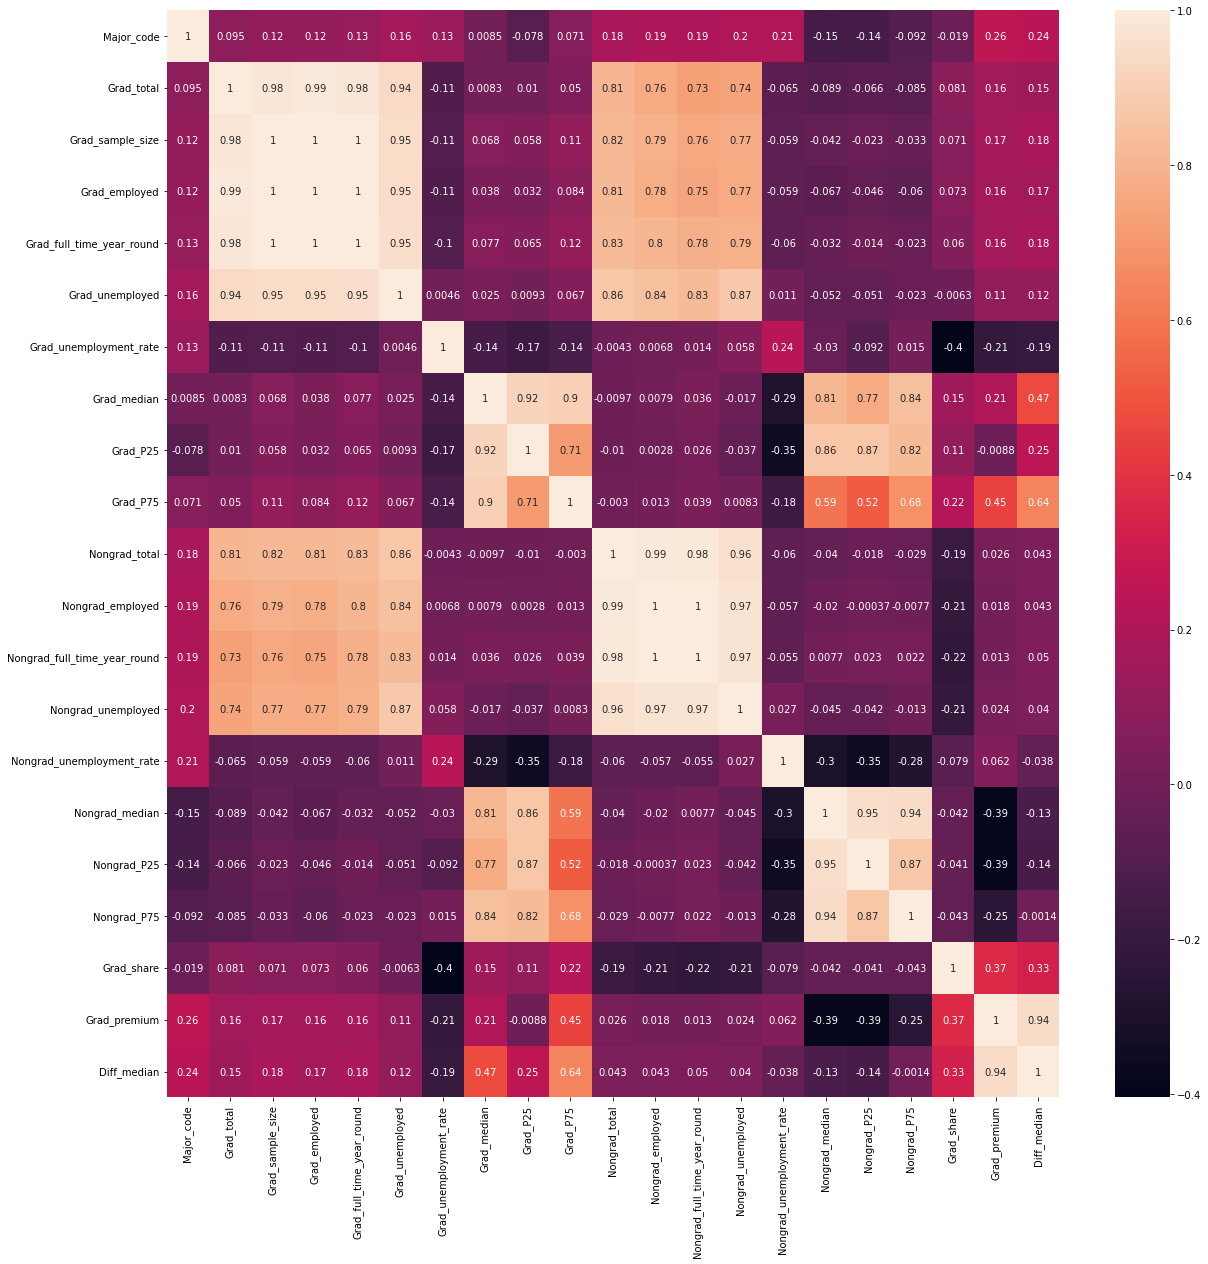

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(grad_df.corr(), annot=True)